In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
years=15
end_date=dt.datetime.now()
start_date=end_date-dt.timedelta(days=years*365)

In [3]:
print(f'Start Date={start_date.date()}\nEnd Date={end_date.date()}')

Start Date=2009-11-20
End Date=2024-11-16


In [4]:
tickers=['SPY', 'BND', 'GLD', 'QQQ', 'VTI']

In [5]:
adj_close_df=pd.DataFrame()

In [6]:
for ticker in tickers:
    data=yf.download(ticker, start=start_date, end=end_date)
    adj_close_df[ticker]=data['Adj Close']

adj_close_df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,SPY,BND,GLD,QQQ,VTI
Date,,,,,
2009-11-20 00:00:00+00:00,82.899323,51.929409,112.940002,37.941128,41.883308
2009-11-23 00:00:00+00:00,83.952324,51.968510,114.290001,38.552532,42.377945
2009-11-24 00:00:00+00:00,84.081108,52.098751,114.730003,38.421520,42.408382
2009-11-25 00:00:00+00:00,84.376549,52.202957,116.620003,38.587467,42.575802
2009-11-27 00:00:00+00:00,83.005379,52.294144,115.059998,38.002266,41.860493
...,...,...,...,...,...
2024-11-11 00:00:00+00:00,598.760010,72.949997,242.139999,513.840027,297.540009
2024-11-12 00:00:00+00:00,596.900024,72.510002,240.050003,512.909973,296.369995
2024-11-13 00:00:00+00:00,597.190002,72.480003,237.630005,512.250000,296.230011


In [7]:
adj_close_df.dropna(inplace=True)
adj_close_df

,SPY,BND,GLD,QQQ,VTI
Date,,,,,
2009-11-20 00:00:00+00:00,82.899323,51.929409,112.940002,37.941128,41.883308
2009-11-23 00:00:00+00:00,83.952324,51.968510,114.290001,38.552532,42.377945
2009-11-24 00:00:00+00:00,84.081108,52.098751,114.730003,38.421520,42.408382
2009-11-25 00:00:00+00:00,84.376549,52.202957,116.620003,38.587467,42.575802
2009-11-27 00:00:00+00:00,83.005379,52.294144,115.059998,38.002266,41.860493
...,...,...,...,...,...
2024-11-11 00:00:00+00:00,598.760010,72.949997,242.139999,513.840027,297.540009
2024-11-12 00:00:00+00:00,596.900024,72.510002,240.050003,512.909973,296.369995
2024-11-13 00:00:00+00:00,597.190002,72.480003,237.630005,512.250000,296.230011


In [8]:
log_returns=np.log(adj_close_df/adj_close_df.shift(1))
log_returns

,SPY,BND,GLD,QQQ,VTI
Date,,,,,
2009-11-20 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN
2009-11-23 00:00:00+00:00,0.012622,0.000753,0.011882,0.015986,0.011741
2009-11-24 00:00:00+00:00,0.001533,0.002503,0.003842,-0.003404,0.000718
2009-11-25 00:00:00+00:00,0.003508,0.001998,0.016339,0.004310,0.003940
2009-11-27 00:00:00+00:00,-0.016384,0.001745,-0.013467,-0.015282,-0.016944
...,...,...,...,...,...
2024-11-11 00:00:00+00:00,0.000952,-0.001917,-0.023751,-0.000584,0.002793
2024-11-12 00:00:00+00:00,-0.003111,-0.006050,-0.008669,-0.001812,-0.003940
2024-11-13 00:00:00+00:00,0.000486,-0.000414,-0.010132,-0.001288,-0.000472


In [9]:
#log returns are addative
log_returns.dropna(inplace=True)
log_returns

,SPY,BND,GLD,QQQ,VTI
Date,,,,,
2009-11-23 00:00:00+00:00,0.012622,0.000753,0.011882,0.015986,0.011741
2009-11-24 00:00:00+00:00,0.001533,0.002503,0.003842,-0.003404,0.000718
2009-11-25 00:00:00+00:00,0.003508,0.001998,0.016339,0.004310,0.003940
2009-11-27 00:00:00+00:00,-0.016384,0.001745,-0.013467,-0.015282,-0.016944
2009-11-30 00:00:00+00:00,0.003371,-0.000498,0.005028,0.001149,0.002542
...,...,...,...,...,...
2024-11-11 00:00:00+00:00,0.000952,-0.001917,-0.023751,-0.000584,0.002793
2024-11-12 00:00:00+00:00,-0.003111,-0.006050,-0.008669,-0.001812,-0.003940
2024-11-13 00:00:00+00:00,0.000486,-0.000414,-0.010132,-0.001288,-0.000472


In [10]:
portfolio_value=1000000
weights=np.array([1/len(tickers)]*len(tickers))
print(weights)

[0.2 0.2 0.2 0.2 0.2]


In [11]:
#returns portfolio return on that date which is the weighted sum of individual returns
historical_returns=(log_returns*weights).sum(axis=1)
historical_returns

Date
2009-11-23 00:00:00+00:00    0.010597
2009-11-24 00:00:00+00:00    0.001038
2009-11-25 00:00:00+00:00    0.006019
2009-11-27 00:00:00+00:00   -0.012066
2009-11-30 00:00:00+00:00    0.002318
                               ...   
2024-11-11 00:00:00+00:00   -0.004501
2024-11-12 00:00:00+00:00   -0.004716
2024-11-13 00:00:00+00:00   -0.002364
2024-11-14 00:00:00+00:00   -0.004747
2024-11-15 00:00:00+00:00   -0.011578
Length: 3771, dtype: float64

In [12]:
#previous X days historical total return (summation of past X days return)
days=5

range_returns=historical_returns.rolling(window=days).sum()
range_returns.dropna(inplace=True)
range_returns

Date
2009-11-30 00:00:00+00:00    0.007906
2009-12-01 00:00:00+00:00    0.006974
2009-12-02 00:00:00+00:00    0.009459
2009-12-03 00:00:00+00:00   -0.001751
2009-12-04 00:00:00+00:00    0.004622
                               ...   
2024-11-11 00:00:00+00:00    0.023664
2024-11-12 00:00:00+00:00    0.010539
2024-11-13 00:00:00+00:00    0.000207
2024-11-14 00:00:00+00:00   -0.015273
2024-11-15 00:00:00+00:00   -0.027906
Length: 3767, dtype: float64

In [13]:
confidence_interval=0.95

#we are looking for the 5th percentile in the entire range of range_returns
VaR=-np.percentile(range_returns, 100- (confidence_interval*100))*portfolio_value

#on a 5 day period, if our portfolio value is 1000000, we can say with 95% confidence that we won't lose more than VaR amount
print(VaR)

24084.80728281265


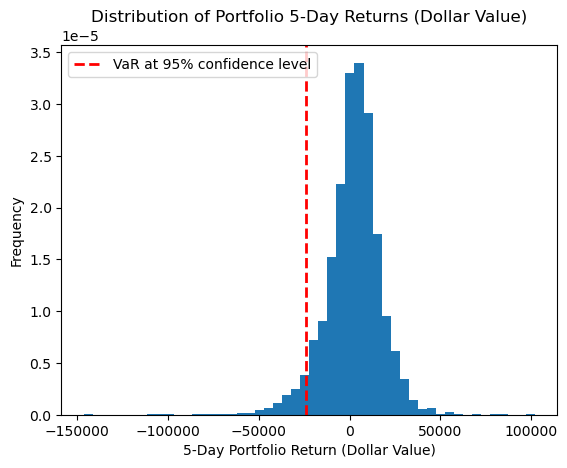

In [14]:
return_window = days
range_returns = historical_returns.rolling(window=return_window).sum()
range_returns = range_returns.dropna()

range_returns_dollar = range_returns * portfolio_value

plt.hist(range_returns_dollar.dropna(), bins=50, density=True)
plt.xlabel(f'{return_window}-Day Portfolio Return (Dollar Value)')
plt.ylabel('Frequency')
plt.title(f'Distribution of Portfolio {return_window}-Day Returns (Dollar Value)')
plt.axvline(-VaR, color='r', linestyle='dashed', linewidth=2, label=f'VaR at {confidence_interval:.0%} confidence level')
plt.legend()
plt.show()